# Define Functions

### Libraries

In [1]:
import sqlalchemy as sql
import pandas as pd
from fbprophet import Prophet

## Information from Database

In [2]:
#Database Connection String
database_connection_string = 'sqlite:///Resources/tourism_data.db'
#Create Engine
engine = sql.create_engine(database_connection_string)

In [3]:
sql_query = """
SELECT ds,y FROM tourism_data
WHERE Country = 'Jamaica'
"""

In [4]:
df = pd.read_sql_query(sql_query,engine)
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      195 non-null    datetime64[ns]
 1   y       195 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 KB


In [5]:
#outliers
df_nopandemic = df.copy()
df_nopandemic.loc[(df_nopandemic['ds'] > '2020-01-01') & (df_nopandemic['ds'] < '2021-08-01'),'y'] = None

In [6]:
#regressor
df['regressor'] = 0
df.loc[(df['ds'] > '2020-01-01') & (df['ds'] < '2021-08-01'),'regressor'] = 1
#df.tail(50)

In [7]:
model = Prophet()

In [8]:
#With Regressor
model.add_regressor('regressor')
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
#with Outliers
model.fit(df_nopandemic)
df_future = model.make_future_dataframe(periods=24, freq='M')

Exception: Prophet object can only be fit once. Instantiate a new object.

In [10]:
#with Regressor
df_future = model.make_future_dataframe(periods=24, freq='M')
df_future['regressor'] = 0
df_future.loc[(df_future['ds'] > '2020-01-01') & (df_future['ds'] < '2021-08-01'),'regressor'] = 1

In [11]:
forecast_data = model.predict(df_future)

In [ ]:
forecast_data.tail()

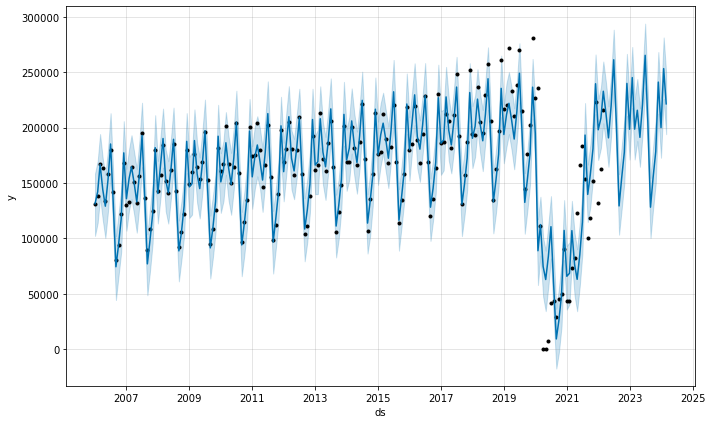

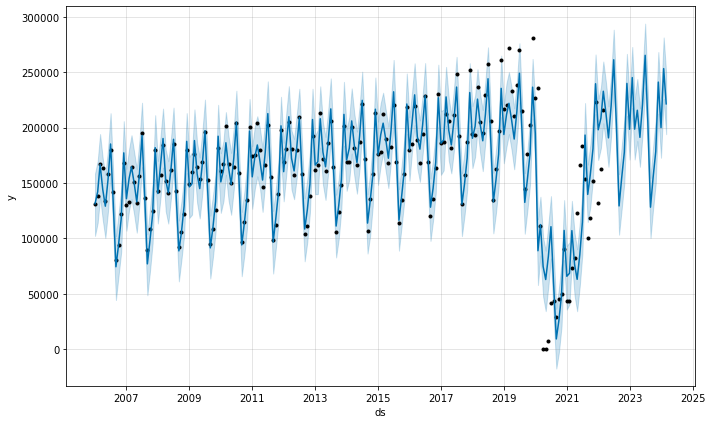

In [12]:
model.plot(forecast_data)

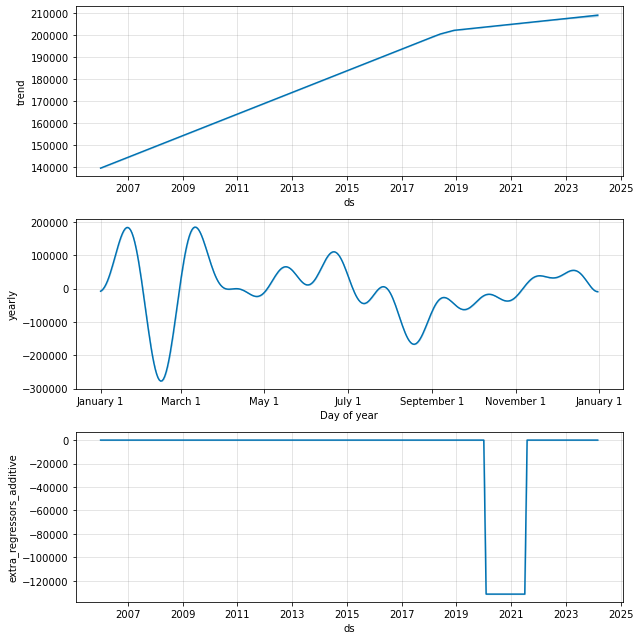

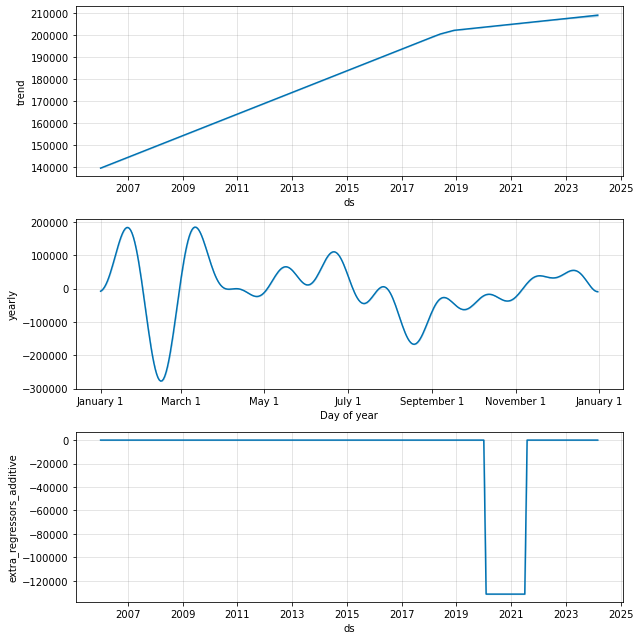

In [13]:
model.plot_components(forecast_data)

,yhat,ds
0,131318.550415,2006-01-01
1,142044.977744,2006-02-01
2,166687.749297,2006-03-01
3,144110.326903,2006-04-01
4,129104.996492,2006-05-01
...,...,...
214,178382.959882,2023-10-31
215,241148.753372,2023-11-30
216,200034.744823,2023-12-31
217,253343.570186,2024-01-31
